In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

Using TensorFlow backend.
/Users/CTR/miniconda3/envs/env1/lib/python3.7/site-packages/keras/datasets/reuters.py:85: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/CTR/miniconda3/envs/env1/lib/python3.7/site-packages/keras/datasets/reuters.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


As with the IMDB dataset, the argument num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data.

In [2]:
len(train_data)

8982

In [3]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
    train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [6]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)


Built in method

In [7]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [8]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [9]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=5,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/5
7982/7982 [==============================] - 2s 192us/step - loss: 2.6368 - accuracy: 0.4967 - val_loss: 1.7836 - val_accuracy: 0.6180
Epoch 2/5
7982/7982 [==============================] - 1s 88us/step - loss: 1.4477 - accuracy: 0.6971 - val_loss: 1.3045 - val_accuracy: 0.7200
Epoch 3/5
7982/7982 [==============================] - 1s 88us/step - loss: 1.0554 - accuracy: 0.7769 - val_loss: 1.1269 - val_accuracy: 0.7610
Epoch 4/5
7982/7982 [==============================] - 1s 103us/step - loss: 0.8325 - accuracy: 0.8274 - val_loss: 1.0330 - val_accuracy: 0.7690
Epoch 5/5
7982/7982 [==============================] - 1s 95us/step - loss: 0.6667 - accuracy: 0.8656 - val_loss: 0.9700 - val_accuracy: 0.7900


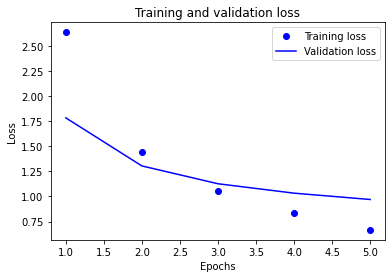

In [12]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

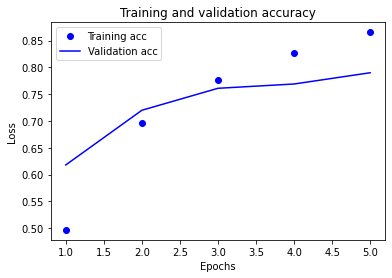

In [13]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [14]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=7,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/7
7982/7982 [==============================] - 1s 158us/step - loss: 2.6686 - accuracy: 0.4778 - val_loss: 1.7502 - val_accuracy: 0.6550
Epoch 2/7
7982/7982 [==============================] - 1s 95us/step - loss: 1.4163 - accuracy: 0.7112 - val_loss: 1.3315 - val_accuracy: 0.6970
Epoch 3/7
7982/7982 [==============================] - 1s 92us/step - loss: 1.0482 - accuracy: 0.7745 - val_loss: 1.1718 - val_accuracy: 0.7470
Epoch 4/7
7982/7982 [==============================] - 1s 108us/step - loss: 0.8263 - accuracy: 0.8255 - val_loss: 1.0677 - val_accuracy: 0.7770
Epoch 5/7
7982/7982 [==============================] - 1s 99us/step - loss: 0.6592 - accuracy: 0.8601 - val_loss: 1.0005 - val_accuracy: 0.7900
Epoch 6/7
7982/7982 [==============================] - 1s 128us/step - loss: 0.5262 - accuracy: 0.8904 - val_loss: 0.9521 - val_accuracy: 0.8030
Epoch 7/7
2246/2246 [==============================] - 0s 102us/step


In [15]:
>>> results
[0.9565213431445807, 0.79697239536954589]

[0.9565213431445807, 0.7969723953695459]

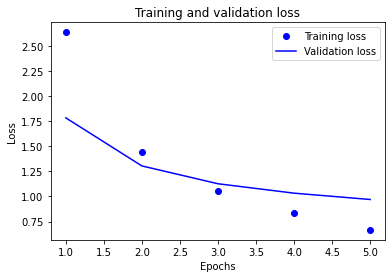

In [16]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [17]:
>>> import copy
>>> test_labels_copy = copy.copy(test_labels)
>>> np.random.shuffle(test_labels_copy)
>>> hits_array = np.array(test_labels) == np.array(test_labels_copy)
>>> float(np.sum(hits_array)) / len(test_labels)
0.18655387355298308

0.18655387355298308

In [18]:
predictions = model.predict(x_test)

In [19]:
>>> predictions[0].shape
(46,)

(46,)

In [20]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])


In [21]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 203us/step - loss: 3.1144 - accuracy: 0.2454 - val_loss: 2.2740 - val_accuracy: 0.5740
Epoch 2/20
7982/7982 [==============================] - 1s 141us/step - loss: 1.7142 - accuracy: 0.6446 - val_loss: 1.5052 - val_accuracy: 0.6580
Epoch 3/20
7982/7982 [==============================] - 1s 134us/step - loss: 1.2831 - accuracy: 0.6919 - val_loss: 1.3552 - val_accuracy: 0.6790
Epoch 4/20
7982/7982 [==============================] - 1s 137us/step - loss: 1.1072 - accuracy: 0.7231 - val_loss: 1.2948 - val_accuracy: 0.6900
Epoch 5/20
7982/7982 [==============================] - 1s 136us/step - loss: 0.9898 - accuracy: 0.7417 - val_loss: 1.2601 - val_accuracy: 0.6990
Epoch 6/20
7982/7982 [==============================] - 1s 146us/step - loss: 0.9007 - accuracy: 0.7597 - val_loss: 1.2516 - val_accuracy: 0.7040
Epoch 7/20
7982/7982 [==============================] - 1s 145us/step - loss